In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv


# Veriye İlk Bakış

Veri setimiz Diabet tahmini için oluşturulmuş bir veri setidir. 22 sütundan oluşmaktadır.

Gerekli pandas ve numpy kütüphaneleri yukarıda eklendiğinden tekrar eklemedim

In [2]:
df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df = df_.copy()
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [3]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.02,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

In [4]:
df.info() # satırlar ve sütunlar hakkında bilgi edindik
df.shape # boyutunu öğrendiğimiz fonk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       68568 non-null  float64
 1   HighBP                68621 non-null  float64
 2   HighChol              68519 non-null  float64
 3   CholCheck             68564 non-null  float64
 4   BMI                   68549 non-null  float64
 5   Smoker                68631 non-null  float64
 6   Stroke                68603 non-null  float64
 7   HeartDiseaseorAttack  68662 non-null  float64
 8   PhysActivity          68570 non-null  float64
 9   Fruits                68566 non-null  float64
 10  Veggies               68586 non-null  float64
 11  HvyAlcoholConsump     68689 non-null  float64
 12  AnyHealthcare         68619 non-null  float64
 13  NoDocbcCost           68558 non-null  float64
 14  GenHlth               68629 non-null  float64
 15  MentHlth           

(70692, 22)

In [5]:
# Veri setindeki kolonlarımız
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income'] 

Veri seti içerisinde toplam 22 kolon vardır.



In [6]:
df.describe().T # burada istatistiksel verilere ulaşarak sütunlar hakkında daha sağlıklı yorumlar yapabilir hale geldik

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,68568.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,68621.0,0.563166,0.495998,0.0,0.0,1.0,1.0,1.0
HighChol,68519.0,0.525285,0.499364,0.0,0.0,1.0,1.0,1.0
CholCheck,68564.0,0.975308,0.155187,0.0,1.0,1.0,1.0,1.0
BMI,68549.0,29.861150,7.113591,12.0,25.0,29.0,33.0,98.0
Smoker,68631.0,0.475587,0.499407,0.0,0.0,0.0,1.0,1.0
Stroke,68603.0,0.061776,0.240750,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,68662.0,0.148131,0.355233,0.0,0.0,0.0,0.0,1.0
PhysActivity,68570.0,0.702406,0.457203,0.0,0.0,1.0,1.0,1.0
Fruits,68566.0,0.611732,0.487360,0.0,0.0,1.0,1.0,1.0


# EKSİK VERİLER

Veri setinde oluşturduğumuz eksik verilerimiz var. Bizim veri setimiz tamamen numerik verilerden oluştuğundan istatistiksel olarak doldurma işlemleri gerçekleştireceğiz. eğer veri setimizde kategorik veriler de olsaydı özelinde daha farklı işlemler gerçekleştirmemiz gerekecekti.

In [7]:
df.isna().sum() # her bir sütundaki eksik verilerimizin sayısının toplamını bize verir

Diabetes_binary         2124
HighBP                  2071
HighChol                2173
CholCheck               2128
BMI                     2143
Smoker                  2061
Stroke                  2089
HeartDiseaseorAttack    2030
PhysActivity            2122
Fruits                  2126
Veggies                 2106
HvyAlcoholConsump       2003
AnyHealthcare           2073
NoDocbcCost             2134
GenHlth                 2063
MentHlth                2128
PhysHlth                2049
DiffWalk                1989
Sex                     2059
Age                     2071
Education               2095
Income                  2111
dtype: int64

Aşağıdaki kod her bir sütundaki eksik verilerin o sütundaki toplam veri sayısının yüzde kaçını oluşturduğunu ifade eder

In [8]:
for c in df.columns:
    eksikVeriler = df[c].isna().sum()
    yuzde = (eksikVeriler / len(df[c]))* 100
    print(f"--{c}-- sütunundaki eksik veriler toplam verilerin yüzde {yuzde:.2f} etmektedir")

--Diabetes_binary-- sütunundaki eksik veriler toplam verilerin yüzde 3.00 etmektedir
--HighBP-- sütunundaki eksik veriler toplam verilerin yüzde 2.93 etmektedir
--HighChol-- sütunundaki eksik veriler toplam verilerin yüzde 3.07 etmektedir
--CholCheck-- sütunundaki eksik veriler toplam verilerin yüzde 3.01 etmektedir
--BMI-- sütunundaki eksik veriler toplam verilerin yüzde 3.03 etmektedir
--Smoker-- sütunundaki eksik veriler toplam verilerin yüzde 2.92 etmektedir
--Stroke-- sütunundaki eksik veriler toplam verilerin yüzde 2.96 etmektedir
--HeartDiseaseorAttack-- sütunundaki eksik veriler toplam verilerin yüzde 2.87 etmektedir
--PhysActivity-- sütunundaki eksik veriler toplam verilerin yüzde 3.00 etmektedir
--Fruits-- sütunundaki eksik veriler toplam verilerin yüzde 3.01 etmektedir
--Veggies-- sütunundaki eksik veriler toplam verilerin yüzde 2.98 etmektedir
--HvyAlcoholConsump-- sütunundaki eksik veriler toplam verilerin yüzde 2.83 etmektedir
--AnyHealthcare-- sütunundaki eksik veriler t

Aşağıdaki kod sütun adı ile o sütundaki eksik verisayısını ver yüzdesini ifade eden df i oluşturur. Böylece görselleştirme ve analiz etmede daha kolay seçenekler elde etmiş oluruz.

In [9]:
toplam_satir = len(df)
eksik_veri_df = pd.DataFrame({
    "Sütun Adı": df.columns,
    "Eksik Veri Sayısı": df.isnull().sum(),
    "Eksik Veri Yüzdesi (%)": (df.isnull().sum() / toplam_satir) * 100
})

eksik_veri_df


,Sütun Adı,Eksik Veri Sayısı,Eksik Veri Yüzdesi (%)
Diabetes_binary,Diabetes_binary,2124,3.004583
HighBP,HighBP,2071,2.929610
HighChol,HighChol,2173,3.073898
CholCheck,CholCheck,2128,3.010242
BMI,BMI,2143,3.031460
Smoker,Smoker,2061,2.915464
Stroke,Stroke,2089,2.955073
HeartDiseaseorAttack,HeartDiseaseorAttack,2030,2.871612
PhysActivity,PhysActivity,2122,3.001754
Fruits,Fruits,2126,3.007412


In [10]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.
df[df.isnull().any(axis = 1)]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
6,NaN,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,13.0,NaN,6.0
7,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,NaN,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,NaN,6.0,4.0,3.0
8,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,6.0,8.0
9,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,NaN,6.0,0.0,1.0,6.0,4.0,4.0
10,NaN,1.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,...,NaN,0.0,3.0,0.0,4.0,0.0,0.0,12.0,4.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70678,1.0,0.0,0.0,1.0,NaN,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,4.0,0.0,10.0,0.0,0.0,7.0,5.0,7.0
70679,1.0,1.0,0.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,3.0,1.0,1.0,11.0,6.0,7.0
70685,NaN,1.0,0.0,1.0,38.0,NaN,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,6.0,2.0
70686,1.0,0.0,1.0,1.0,27.0,0.0,NaN,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,0.0,1.0,11.0,2.0,3.0


In [11]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.
df[df.notnull().all(axis = 1)][:5]

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [12]:
#!pip install missingno # bir kere yükleme işlemini gerçekleştirdik. tekrar çalışmasına gerek yok
import missingno as msno

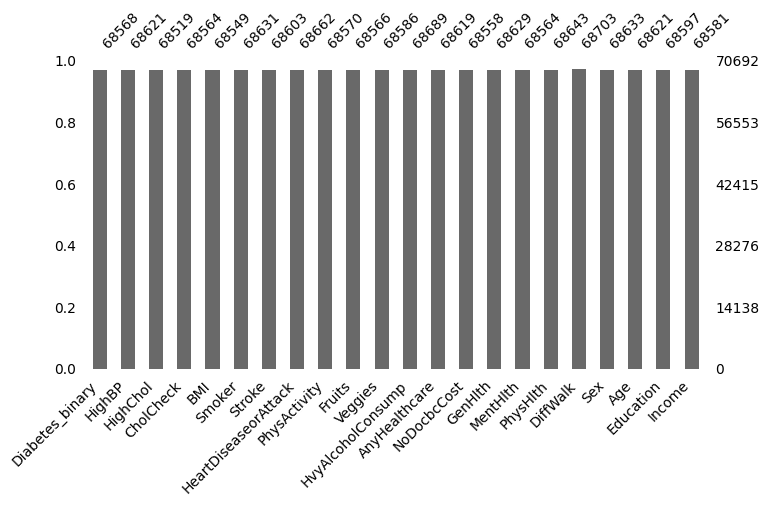

In [13]:
msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

Aşağıdaki kodu istediğimiz sütunlardaki eksik verilerin birbirleri ile ilişkili olup olmadığını kontrol için kullanırız

Biz fonksiyonla oluşturduğumuz için muhtemelen ilişkili çıkmayacak fakat doğal yolla eksik olsaydı belkide birinin eksik olması diğerinin de eksik olmasına sebebiyet verebileceğinden bunun kontrolünü yapmış oluruz.

Bu durum bizim eksik verileri doldurmamızda da işimize yarayacaktır. ya da o kadar bağımlıdır ki dolurmak yerine o verieri silmek daha sağlıklı olacaktır ya da eksik verilerdeki bağlılık yüksekse eksik olmayanlardan verilerden eksikleri tahmin eden bir model oluşturulup eksik veriler doldurulabilir.

Hakeza zaman serilerinde serinin bozulmaması adına sırada bir eksik veri varsa öne o eksik veri için model oluşturulur ki seriden veri çıkarılarak zaman serisi özelliği kaybedilmesin

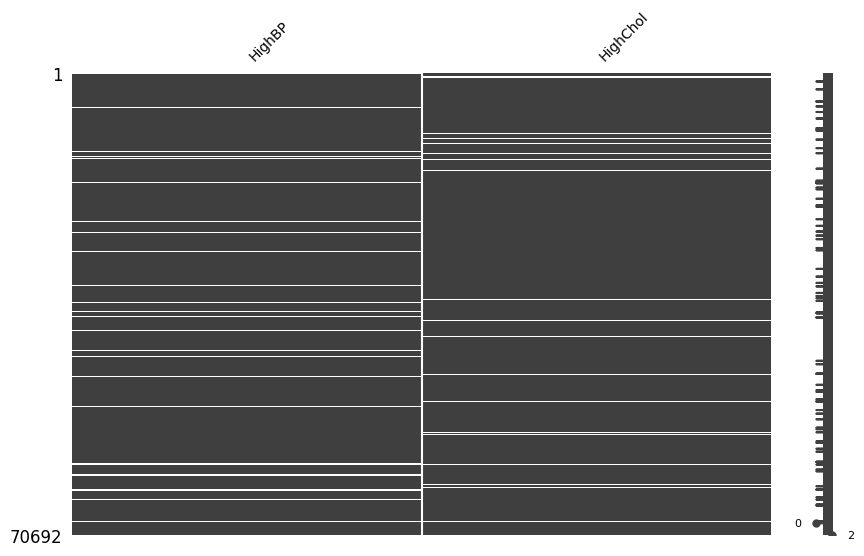

In [14]:
msno.matrix(df = df[['HighBP', 'HighChol']],
            figsize = (10, 6),
            fontsize = 10);
# buradaki beyazlıklar eksik verileri temsil etmektedir. eğer beyaz çizgilerimiz sürekli karşı karşıya gelselerdi,
# aralarında bir bağlantı - örüntü olduğu düşünülebilirdi

# Eksik Verileri Doldurma
Şimdi eksik verileri doldurma adımına geçeceğiz. Burada daha önce yaptığımız istatistiksel sonuçlardan yararlanarak ilerleyeceğiz. Standart sapmasına, mod-medyan-ortalamasına bakarak,25. ve 75. yüzdelik değerlerini kontrol ederek ve sütunlardaki verilerin türlerine göre hareket edeceğiz. Örneğin verilerimiz 0-1 ile oluşuryorsa ya da 0-1-2 diye gidiyorsa aslında burada bir kategorik verinin numerilize edildiğini anlayabiliriz bu durumda doldurma işlemini buna göre yapacağız.

In [15]:
# istatiksel sonuçları tekrar yazdıralım
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,68568.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,68621.0,0.563166,0.495998,0.0,0.0,1.0,1.0,1.0
HighChol,68519.0,0.525285,0.499364,0.0,0.0,1.0,1.0,1.0
CholCheck,68564.0,0.975308,0.155187,0.0,1.0,1.0,1.0,1.0
BMI,68549.0,29.861150,7.113591,12.0,25.0,29.0,33.0,98.0
Smoker,68631.0,0.475587,0.499407,0.0,0.0,0.0,1.0,1.0
Stroke,68603.0,0.061776,0.240750,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,68662.0,0.148131,0.355233,0.0,0.0,0.0,0.0,1.0
PhysActivity,68570.0,0.702406,0.457203,0.0,0.0,1.0,1.0,1.0
Fruits,68566.0,0.611732,0.487360,0.0,0.0,1.0,1.0,1.0


Sırasıyla aşağıdaki verilerimiz 0-1 değerlerine sahiptir. veriyi incelediğimizde de "evet/hayır", "kadın/erkek" gibi sorularının cevapları olduğunu görüyoruz. bu durumda benim kişisel tercihim en çok tekrar eden değere göre doldurmaktır. Çünkü verilerimiz bir bölgede, tarihte ya da bir gruba yapıldıysa en çok tekrar eden durum genelleme yapmamıza olanak sağlar ve veriyi bozacak bir doldurma işlemi olmaktan çıkarır
* Diabets_Binary
* HighBP
* HighChol
* CholCheck
* Smoker
* Stroke
* HeartDiseaseorAttack
* PhysActivity
* Fruits
* Veggies
* HvyAlcoholConsump
* AnyHealthcare
* NoDocbcCost
* DiffWalk
* Sex

**MOD** ile doldurma


In [16]:
binary_columns = [
    "Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"
]

for column in binary_columns:
    mode_value = df[column].mode()[0]  # Moda değerini al
    df[column].fillna(mode_value, inplace=True)  # Eksik değerleri doldur
# burada inplace = true yaparak veri setimize işlemiş olduk


/tmp/ipykernel_17/340892937.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)  # Eksik değerleri doldur


In [17]:
print(df["Diabetes_binary"].isna().sum())
# örnek bi sütun içi kontrol sağladık ve doldurma işlemi gerçekleşmiş

0


Şimdi sürekli sayısal değişkenlerin olduğu sütunlara gidelim.
min ve max değerlerine bakarak hareket edebiliriz çünkü standart sapması çok da sağlıklı sonuçlar vermemiş olacak
İlk önce bir normal dağılıma sahipler mi kontrol edelim

In [18]:
# bu kolonlar hariç olarak kontrol edeceğiz
binary_columns = [
    "Diabetes_binary", "HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"
]

non_binary_columns = [col for col in df.columns if col not in binary_columns]
non_binary_data = df[non_binary_columns]

print(non_binary_data.head())

    BMI  GenHlth  MentHlth  PhysHlth   Age  Education  Income
0  26.0      3.0       5.0      30.0   4.0        6.0     8.0
1  26.0      3.0       0.0       0.0  12.0        6.0     8.0
2  26.0      1.0       0.0      10.0  13.0        6.0     8.0
3  28.0      3.0       0.0       3.0  11.0        6.0     8.0
4  29.0      2.0       0.0       0.0   8.0        5.0     8.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


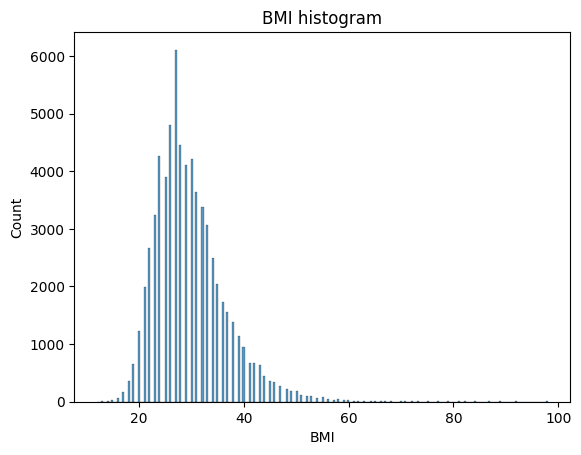

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


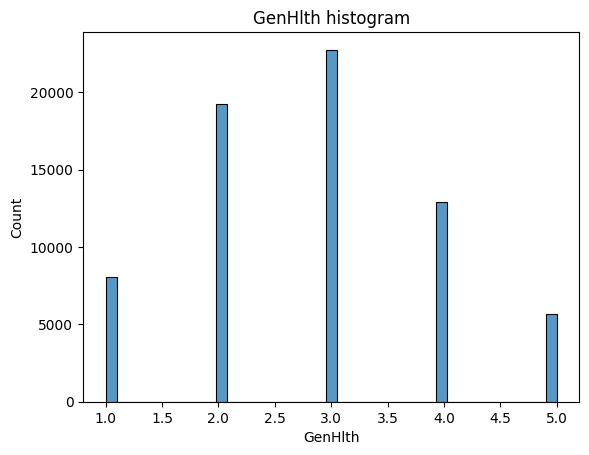

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


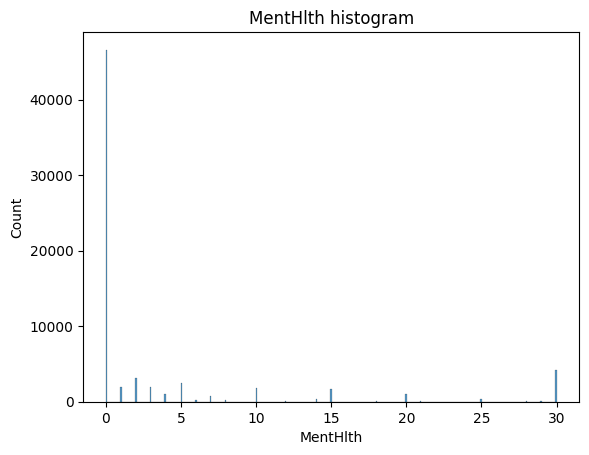

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


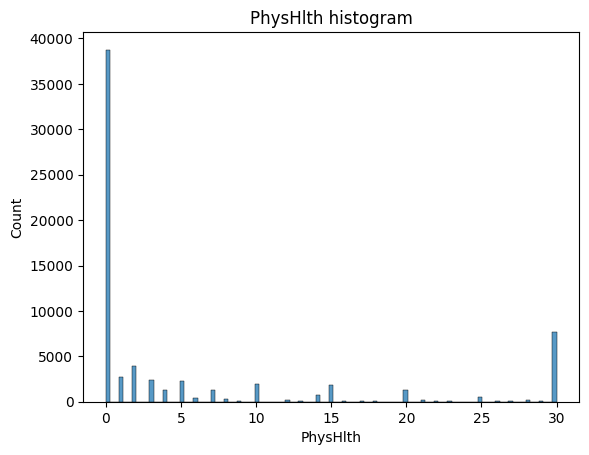

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


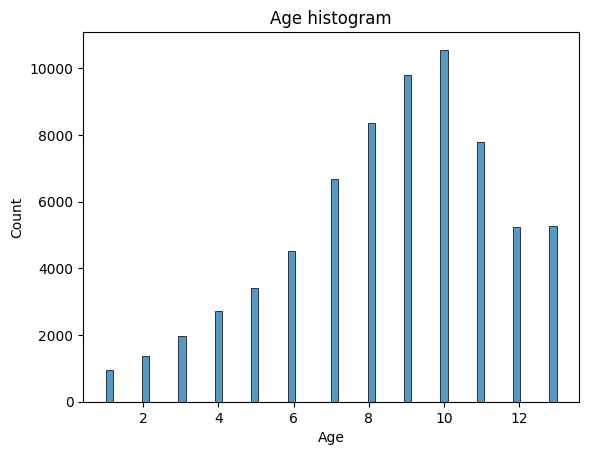

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


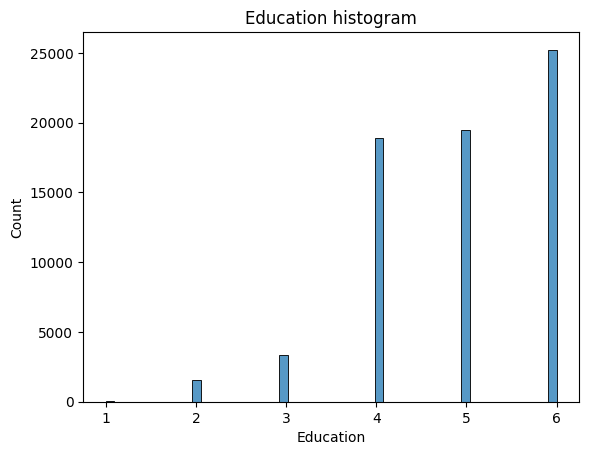

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


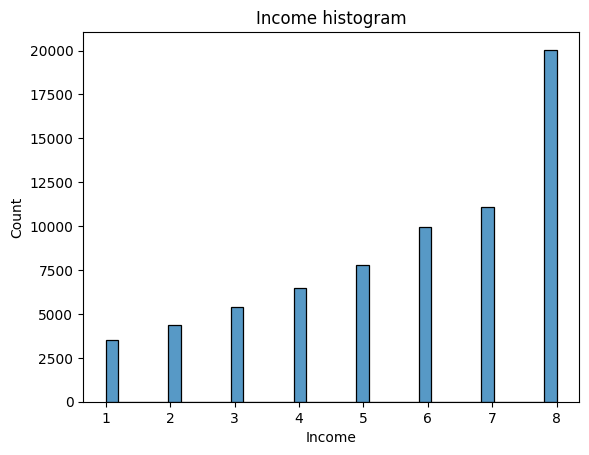

In [19]:
# normal dağılıma sahip olup olmama durumunu veri görselleştirme ile kontrol edeceğiz 
# bunun için gerekli görselleştirme kütüphanelerini ekledik
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

for nbd in non_binary_data:
    sns.histplot(non_binary_data[nbd])
    plt.title(f"{nbd} histogram")
    plt.show()


Yukarıdaki histogramları kontrol ettiğimizde normal dağılıma meyilli hiçbir verimiz bulunmamaktadır. Yani aslında uç değerlerden etkilenen bir veriye saihibiz demektir. bu durumda **ortalama** ile doldurmak yerine **ortanca** ile doldurma yöntemini seçeceğiz

In [20]:
# ortanca ile doldurma

for nbd in non_binary_data:
    median_value = df[nbd].median()
    df[nbd].fillna(median_value, inplace = True)
    

print(df["BMI"].isna().sum())

0


/tmp/ipykernel_17/2621704306.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[nbd].fillna(median_value, inplace = True)
/tmp/ipykernel_17/2621704306.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Aşağıda da görüldüğü gibi artık eksik hiçbir verimiz yok

In [21]:
#df.info()
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# Aykırı Değer Analizi

Burada artık aykırı değer analizi yapacağız. Outlier değerler ile aykırı değerleri bulup doldurma işlemini gerçekleştireceğiz.

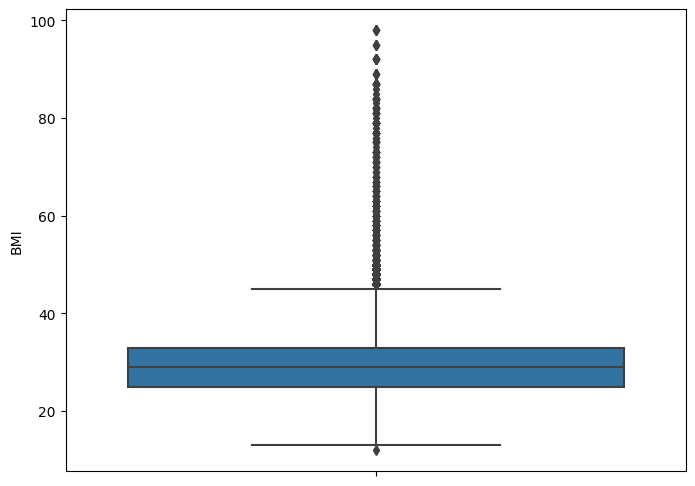

In [22]:
# boxplot kullanalım
# Vücut kitle indxi(BMI) için aykırı değer kontrolü yapalım

plt.figure(figsize = (8, 6))
sns.boxplot(data = df,
            y = df["BMI"],
            orient = "v");

In [23]:
bmi = df["BMI"]
bmi

0        26.0
1        26.0
2        26.0
3        28.0
4        29.0
         ... 
70687    29.0
70688    29.0
70689    25.0
70690    18.0
70691    25.0
Name: BMI, Length: 70692, dtype: float64

In [24]:
# BMI için istatiksel sonuçlarımız
df["BMI"].describe().T

count    70692.000000
mean        29.835045
std          7.006493
min         12.000000
25%         25.000000
50%         29.000000
75%         33.000000
max         98.000000
Name: BMI, dtype: float64

In [25]:
Q1 = bmi.quantile(0.25) # ilk çeyrek
Q3 = bmi.quantile(0.75) # 3. çeyrek

IQR = Q3 - Q1

# alt ve üst limitler
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(lower_limit)
print(upper_limit)

# gördüğümüz değerlerden küçükler ve büyükler bizler için aykırı durumlar oluyor.
# bunları temizleyip tekrar dolduracağız

13.0
45.0


In [26]:
outliers = bmi[(bmi < lower_limit) | (bmi > upper_limit)]
outliers


13       58.0
42       47.0
99       47.0
177      47.0
192      52.0
         ... 
70606    48.0
70620    46.0
70637    60.0
70645    46.0
70648    49.0
Name: BMI, Length: 2125, dtype: float64

In [27]:
# sonuçların topluca yazdırılması
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Alt limit: {lower_limit}, Üst limit: {upper_limit}")
print(f"Aykırı değer sayısı: {len(outliers)}")
print("Aykırı değerler:\n", outliers)

Q1: 25.0, Q3: 33.0, IQR: 8.0
Alt limit: 13.0, Üst limit: 45.0
Aykırı değer sayısı: 2125
Aykırı değerler:
 13       58.0
42       47.0
99       47.0
177      47.0
192      52.0
         ... 
70606    48.0
70620    46.0
70637    60.0
70645    46.0
70648    49.0
Name: BMI, Length: 2125, dtype: float64


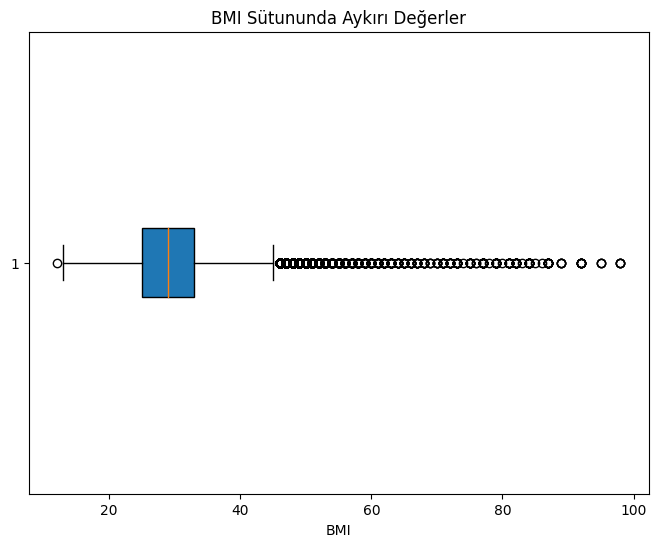

In [28]:
# görselleştirme
plt.figure(figsize=(8, 6))
plt.boxplot(bmi, vert=False, patch_artist=True)
plt.title("BMI Sütununda Aykırı Değerler")
plt.xlabel("BMI")
plt.show()

In [29]:
# BMI sütunundaki aykırı derğerler sütundaki değerlerin yüzde kaçı bunu görmek istedik
data = len(df["BMI"])
yuzde = (len(outliers) / data) * 100


Eksik verileri doldururken BMI sütunu için inceleme yaptığımızda doldurma işleminin **ortanca** ile daha sağlıklı olacağına karar vermiştik.
Şimdi de aykırı değerlerin index numarasını alarak bu indexte bulunan değerleri de ortanca ile dolduralım

In [30]:
# aykırı değerlein index numarasını aldık ve o indexte bulunan aykırı değerleri median ile değiştirdik
index = bmi[(bmi < lower_limit) | (bmi > upper_limit)].index

median_value = df["BMI"].median()

# Aykırı değerleri medyan ile doldur
for ind in index:
    df.loc[ind, "BMI"] = median_value

print(df.loc[index, "BMI"])



13       29.0
42       29.0
99       29.0
177      29.0
192      29.0
         ... 
70606    29.0
70620    29.0
70637    29.0
70645    29.0
70648    29.0
Name: BMI, Length: 2125, dtype: float64


In [31]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


# Feature Engineering

Veri setimizdeki bazı verilerden ilişkiler kurarak anlamlı sonuçlar çıkarmaya çalışacağız

In [32]:
# Vücut kitle endexine göre Dünya Sağlık Örgütünün (WHO) sınıflandırması ile
'''''
Underweight (BMI < 18.5)
Normal (18.5 <= BMI < 25)
Overweight (25 <= BMI < 30)
Obese (BMI >= 30)
'''
def categorize_bmi(value):
    if value < 18.5:
        return 'Underweight'
    elif 18.5 <= value < 25:
        return 'Normal'
    elif 25 <= value < 30:
        return 'Overweight'
    else:
        return 'Obese'

new_df = df.copy()
new_df["BMI_Category"] = new_df['BMI'].apply(categorize_bmi)

print(new_df[["BMI","BMI_Category"]])


        BMI BMI_Category
0      26.0   Overweight
1      26.0   Overweight
2      26.0   Overweight
3      28.0   Overweight
4      29.0   Overweight
...     ...          ...
70687  29.0   Overweight
70688  29.0   Overweight
70689  25.0   Overweight
70690  18.0  Underweight
70691  25.0   Overweight

[70692 rows x 2 columns]


In [33]:
# yaşlara göre BMI ortalaması gruplaması yaptık. böylece yaşıtlarının ortalama endexine göre karşılaştırma yapılabilir
new_df["BMI_AgeGroupMean"] = new_df.groupby("Age")["BMI"].transform("mean")
selected_columns = ["Age","BMI","BMI_AgeGroupMean"]
new_df[selected_columns]


,Age,BMI,BMI_AgeGroupMean
0,4.0,26.0,28.854398
1,12.0,26.0,28.530671
2,13.0,26.0,26.989392
3,11.0,28.0,29.197385
4,8.0,29.0,29.759315
...,...,...,...
70687,6.0,29.0,29.474801
70688,10.0,29.0,29.679458
70689,13.0,25.0,26.989392
70690,11.0,18.0,29.197385


# Model Tavsiyesi

Elmizdeki veri setimiz için kullanabileceğiniz yapay zeka algoritmasını **Random Forest** olarak tavsiye edebilirim. Gerekçeler olarak;
* Veri setimizdeki hiç kategorik veri yok
* Verilerimizin çoğu "evet/hayır", "var/yok" gibi soruların cevabıdır. Random Forest çalışma mantığı ile oluşturulacak ağaçlar için sağlıklı ayrılma kolları oluşturabilir.